In this project, we begin our predictive analysis by applying Decision Trees as the first classification algorithm. Decision Trees are an excellent starting point because they are intuitive, easy to interpret, and capable of handling both numerical and categorical variables without extensive preprocessing. Moreover, they allow us to visualize how different household and housing characteristics contribute to socioeconomic stratification, which aligns with the objective of building a classifier for household living conditions. Although more complex models may be explored later, Decision Trees provide a solid baseline and valuable insights into the structure of our data.

In [55]:
# Basic library importation

import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [56]:
# Dataframe importation
df = pd.read_csv('df2_eneigh_2024.csv')

# Drop unnecesary columns
df.drop(columns='Unnamed: 0', inplace=True)

# Verify correct importation
df.head(10)

,folioviv,foliohog_x,entidad_x,ingreso_promedio,poca_variedad_alimentos,alimentacion_cereales,alimentacion_carne,alimentacion_huevo,alimentacion_pescado,telefono,celular,conex_inte,num_auto,tarjeta,pagotarjet,negcua,est_alim,est_trans,numren,edad_promedio,alfabetism,asis_esc,num_trabaj,discapacidad,tipo_viv,mat_pared,mat_pisos,num_cuarto,ab_agua,disp_elect,total_dispositivos,est_socio
0,100001901,1,Aguascalientes,45546.67,0,7,3,7,0,0,1,1,3,0,0,0,5100,0,4,16,1.0,4,4,4,7,8,3,4,1,1,6,Upper-middle stratum
1,100001902,1,Aguascalientes,37666.67,0,7,4,7,1,1,1,1,3,1,0,0,12000,0,4,34,1.0,4,4,4,1,8,3,4,1,1,6,Upper-middle stratum
2,100001904,1,Aguascalientes,19083.33,1,7,7,7,0,1,1,1,3,0,0,0,4350,0,2,44,1.0,2,2,2,1,8,3,3,1,1,6,Upper-middle stratum
3,100001905,1,Aguascalientes,35700.00,0,7,4,7,0,1,1,1,3,1,1,0,8000,0,4,28,1.0,4,4,4,1,8,3,3,1,1,7,Upper-middle stratum
4,100002501,1,Aguascalientes,43088.00,0,7,3,3,2,1,1,1,1,1,0,0,12000,2000,4,19,1.0,4,4,4,4,8,3,3,1,1,4,Lower-middle stratum
5,100002502,1,Aguascalientes,39311.00,0,7,4,2,0,1,1,1,3,1,0,0,9392,0,4,25,1.0,4,4,4,4,8,2,4,1,1,4,Lower-middle stratum
6,100002504,1,Aguascalientes,21483.33,0,7,2,7,0,0,1,1,1,0,0,0,7500,1000,4,16,1.0,4,4,4,4,8,3,3,1,1,1,Lower-middle stratum
7,100002505,1,Aguascalientes,30900.00,0,7,7,7,2,1,1,1,2,0,0,0,6000,0,4,20,1.0,4,4,4,4,8,2,3,1,1,3,Lower-middle stratum
8,100002506,1,Aguascalientes,16125.00,0,7,0,2,0,1,1,1,1,1,0,0,4000,500,3,32,1.0,3,3,3,4,8,3,3,1,1,2,Lower-middle stratum
9,100003701,1,Aguascalientes,28783.33,0,7,3,3,3,1,1,1,3,0,0,0,12000,300,4,42,1.0,4,4,4,1,8,3,4,1,1,2,Lower-middle stratum


In [57]:
# Verify data types
print(df.dtypes)

folioviv                     int64
foliohog_x                   int64
entidad_x                   object
ingreso_promedio           float64
poca_variedad_alimentos      int64
alimentacion_cereales        int64
alimentacion_carne           int64
alimentacion_huevo           int64
alimentacion_pescado         int64
telefono                     int64
celular                      int64
conex_inte                   int64
num_auto                     int64
tarjeta                      int64
pagotarjet                   int64
negcua                       int64
est_alim                     int64
est_trans                    int64
numren                       int64
edad_promedio                int64
alfabetism                 float64
asis_esc                     int64
num_trabaj                   int64
discapacidad                 int64
tipo_viv                     int64
mat_pared                    int64
mat_pisos                    int64
num_cuarto                   int64
ab_agua             

Nominal variables such as `tipo_viv`, `ab_agua`, `entidad`, and `disp_elect` will be transformed using one-hot encoding to optimize calculations. In the case of ordinal variables such as `mat_pared`and `mat_pisos`, they will remain unmodified. 

In addition, we will map the federal states as numbers to perform the analysis and avoir code errors. 

In [58]:
# Create a diccionaty to map federal states
estados_dict = {
    "Aguascalientes": 1,
    "Baja_California": 2,
    "Baja_California_Sur": 3,
    "Campeche": 4,
    "Coahuila": 5,
    "Colima": 6,
    "Chiapas": 7,
    "Chihuahua": 8,
    "Ciudad_de_Mexico": 9,
    "Durango": 10,
    "Guanajuato": 11,
    "Guerrero": 12,
    "Hidalgo": 13,
    "Jalisco": 14,
    "Mexico": 15,
    "Michoacan": 16,
    "Morelos": 17,
    "Nayarit": 18,
    "Nuevo_Leon": 19,
    "Oaxaca": 20,
    "Puebla": 21,
    "Queretaro": 22,
    "Quintana_Roo": 23,
    "San_Luis_Potosi": 24,
    "Sinaloa": 25,
    "Sonora": 26,
    "Tabasco": 27,
    "Tamaulipas": 28,
    "Tlaxcala": 29,
    "Veracruz": 30,
    "Yucatan": 31,
    "Zacatecas": 32
}

# Map federal states
df['entidad_x'] = df['entidad_x'].map(estados_dict)


# One hot encoding for nominal variables
onehot_cols = ['tipo_viv','mat_pared','mat_pisos','ab_agua','disp_elect','entidad_x']
df = pd.get_dummies(df,columns=onehot_cols, drop_first=False, dtype=int)
df.head()

,folioviv,foliohog_x,ingreso_promedio,poca_variedad_alimentos,alimentacion_cereales,alimentacion_carne,alimentacion_huevo,alimentacion_pescado,telefono,celular,conex_inte,num_auto,tarjeta,pagotarjet,negcua,est_alim,est_trans,numren,edad_promedio,alfabetism,asis_esc,num_trabaj,discapacidad,num_cuarto,total_dispositivos,est_socio,tipo_viv_1,tipo_viv_2,tipo_viv_3,tipo_viv_4,tipo_viv_5,tipo_viv_6,tipo_viv_7,mat_pared_1,mat_pared_2,mat_pared_3,mat_pared_4,mat_pared_5,mat_pared_6,mat_pared_7,mat_pared_8,mat_pisos_1,mat_pisos_2,mat_pisos_3,ab_agua_1,ab_agua_2,ab_agua_3,ab_agua_4,ab_agua_5,ab_agua_6,disp_elect_1,disp_elect_2,disp_elect_3,disp_elect_4,disp_elect_5,entidad_x_1,entidad_x_2,entidad_x_3,entidad_x_4,entidad_x_5,entidad_x_6,entidad_x_7,entidad_x_8,entidad_x_9,entidad_x_10,entidad_x_11,entidad_x_12,entidad_x_13,entidad_x_14,entidad_x_15,entidad_x_16,entidad_x_17,entidad_x_18,entidad_x_19,entidad_x_20,entidad_x_21,entidad_x_22,entidad_x_23,entidad_x_24,entidad_x_25,entidad_x_26,entidad_x_27,entidad_x_28,entidad_x_29,entidad_x_30,entidad_x_31,entidad_x_32
0,100001901,1,45546.67,0,7,3,7,0,0,1,1,3,0,0,0,5100,0,4,16,1.0,4,4,4,4,6,Upper-middle stratum,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100001902,1,37666.67,0,7,4,7,1,1,1,1,3,1,0,0,12000,0,4,34,1.0,4,4,4,4,6,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100001904,1,19083.33,1,7,7,7,0,1,1,1,3,0,0,0,4350,0,2,44,1.0,2,2,2,3,6,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100001905,1,35700.00,0,7,4,7,0,1,1,1,3,1,1,0,8000,0,4,28,1.0,4,4,4,3,7,Upper-middle stratum,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100002501,1,43088.00,0,7,3,3,2,1,1,1,1,1,0,0,12000,2000,4,19,1.0,4,4,4,3,4,Lower-middle stratum,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Our data is now ready to analyze. First, we wil define our matrix `X` and our vector `Y`. Then, we will create our training and test groups using `train_test_split` from sklearn.

In [59]:
# Define feature_cols for array X
feature_cols = ['ingreso_promedio', 'poca_variedad_alimentos',
       'alimentacion_cereales', 'alimentacion_carne', 'alimentacion_huevo',
       'alimentacion_pescado', 'telefono', 'celular', 'conex_inte', 'num_auto',
       'tarjeta', 'pagotarjet', 'negcua', 'est_alim', 'est_trans', 'numren',
       'edad_promedio', 'alfabetism', 'asis_esc', 'num_trabaj', 'discapacidad',
       'num_cuarto', 'total_dispositivos', 'tipo_viv_1',
       'tipo_viv_2', 'tipo_viv_3', 'tipo_viv_4', 'tipo_viv_5', 'tipo_viv_6',
       'tipo_viv_7', 'mat_pared_1', 'mat_pared_2', 'mat_pared_3',
       'mat_pared_4', 'mat_pared_5', 'mat_pared_6', 'mat_pared_7',
       'mat_pared_8', 'mat_pisos_1', 'mat_pisos_2', 'mat_pisos_3', 'ab_agua_1',
       'ab_agua_2', 'ab_agua_3', 'ab_agua_4', 'ab_agua_5', 'ab_agua_6',
       'disp_elect_1', 'disp_elect_2', 'disp_elect_3', 'disp_elect_4',
       'disp_elect_5', 'entidad_x_1', 'entidad_x_2', 'entidad_x_3',
       'entidad_x_4', 'entidad_x_5', 'entidad_x_6', 'entidad_x_7',
       'entidad_x_8', 'entidad_x_9', 'entidad_x_10', 'entidad_x_11',
       'entidad_x_12', 'entidad_x_13', 'entidad_x_14', 'entidad_x_15',
       'entidad_x_16', 'entidad_x_17', 'entidad_x_18', 'entidad_x_19',
       'entidad_x_20', 'entidad_x_21', 'entidad_x_22', 'entidad_x_23',
       'entidad_x_24', 'entidad_x_25', 'entidad_x_26', 'entidad_x_27',
       'entidad_x_28', 'entidad_x_29', 'entidad_x_30', 'entidad_x_31',
       'entidad_x_32']

# Define X array
X = df[feature_cols].values

# Define vector Y
y = df.est_socio

# Create training and test groups
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 32)

## Decision Tree: Criteria and Depth

To build our decision tree model, we will explore two node-splitting criteria:

- **Gini**: measures the impurity of a node; lower values indicate that the samples mostly belong to a single class.
- **Entropy**: measures the uncertainty of a node using information theory; it seeks divisions that maximize the reduction in uncertainty.

Additionally, we will use the **`max_depth`** parameter with different values. This allows us to control the maximum depth of the tree and avoid overfitting, ensuring the model generalizes better to new data. By testing different values, we can find a balance between complexity and performance.


## 1. Gini criteria

In [60]:
for i in range(1,5):
    
    # Create decision tree classifier object
    clf_g = DecisionTreeClassifier (criterion = 'gini', max_depth = i)

    # Apply algorithm to train group
    clf_g = clf.fit (X_train, y_train)

    # Make prediction on test group
    y_pred = clf.predict (X_test)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Evaluation metrics
    from sklearn.metrics import classification_report
    print ('Gini criteria with max depth =',i,':')
    print (classification_report(y_test, y_pred))
    print ('\n')

Gini criteria with max depth = 1 :
                      precision    recall  f1-score   support

        High stratum       0.93      0.98      0.95      9219
         Low stratum       1.00      0.91      0.95      9050
Lower-middle stratum       0.91      0.92      0.92      9157
Upper-middle stratum       0.90      0.93      0.91      9140

            accuracy                           0.93     36566
           macro avg       0.94      0.93      0.93     36566
        weighted avg       0.94      0.93      0.93     36566



Gini criteria with max depth = 2 :
                      precision    recall  f1-score   support

        High stratum       0.93      0.98      0.95      9219
         Low stratum       1.00      0.91      0.95      9050
Lower-middle stratum       0.91      0.92      0.92      9157
Upper-middle stratum       0.90      0.93      0.91      9140

            accuracy                           0.93     36566
           macro avg       0.94      0.93      0.93    

## 2. Entropy criteria

In [61]:
for i in range(1,5):
    # Create decision tree classifier object
    clf_e = DecisionTreeClassifier (criterion = 'entropy', max_depth = i)

    # Apply algorithm to train group
    clf_e = clf.fit (X_train, y_train)

    # Make prediction on test group
    y_pred = clf.predict (X_test)

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Evaluation metrics
    from sklearn.metrics import classification_report
    print ('Entropy criteria with max depth =',i,':')
    print (classification_report(y_test, y_pred))
    print ('\n')

Entropy criteria with max depth = 1 :
                      precision    recall  f1-score   support

        High stratum       0.93      0.98      0.95      9219
         Low stratum       1.00      0.91      0.95      9050
Lower-middle stratum       0.91      0.92      0.92      9157
Upper-middle stratum       0.90      0.93      0.91      9140

            accuracy                           0.93     36566
           macro avg       0.94      0.93      0.93     36566
        weighted avg       0.94      0.93      0.93     36566



Entropy criteria with max depth = 2 :
                      precision    recall  f1-score   support

        High stratum       0.93      0.98      0.95      9219
         Low stratum       1.00      0.91      0.95      9050
Lower-middle stratum       0.91      0.92      0.92      9157
Upper-middle stratum       0.90      0.93      0.91      9140

            accuracy                           0.93     36566
           macro avg       0.94      0.93      0.

The Gini criterion and the entropy criterion showed optimal results with a maximum depth of 3. For practical purposes in this project, the Gini criterion will be used to test random forest.

Finally, we will create an image showing the decision tree using graphviz and pydotplus.

In [62]:
!pip install graphviz
!pip install pydotplus

In [65]:
from sklearn import tree
import graphviz
import pydotplus
from PIL import Image

# Rewrite code for tree
clf = DecisionTreeClassifier (criterion = 'gini', max_depth = 3)
clf = clf.fit (X_train, y_train)
y_pred = clf.predict (X_test)
cm = confusion_matrix(y_test, y_pred)

# Return class labels
class_labels = clf.classes_

# Define rules for decision tree
dot_data = tree.export_graphviz(clf, out_file= None, feature_names = feature_cols, class_names=class_labels.astype(str),
                               filled=True,
                               rounded=True)

# Create graph 
graph = pydotplus.graph_from_dot_data(dot_data)

# Create tree in PNG format
graph.write_png('stratum_tree.png')
image = Image.open('stratum_tree.png')
image.show()

And here it's the result:
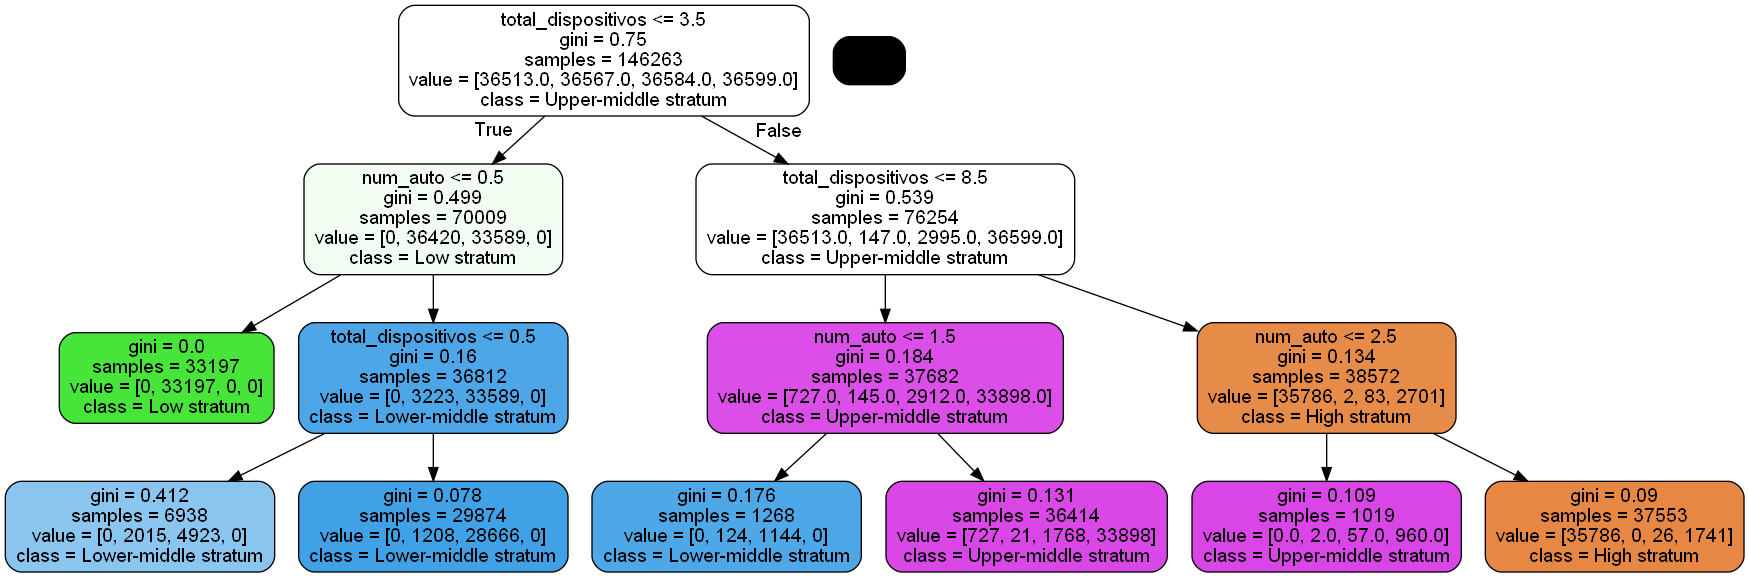

Let's dive a little deeper into class classification according to the decision tree using the Gini criterion:
* __Low stratum stratum__: For a household to be classified as Low stratum, two key conditions must be met: The household has 3.5 or fewer electronic devices in total (`total_dispositivos` <= 3.5) and it has 0.5 or fewer cars (``num_auto`` <= 0.5). If these two conditions are met, the model predicts with high certainty that the household is in the Low stratum.


* __Lower-middle stratum__: The classification for this stratum is more complex, as it is found in several branches of the tree. The prediction is mainly based on the number of devices and cars:

    * Path 1 * : `total_dispositivos` (total electronic devices) <= 3.5 and `num_auto` (total number of cars) > 0.5. In this branch, the model focuses on the number of devices. If the household has 0.5 or fewer electronic devices (`total_dispositivos` <= 0.5), the model classifies it as Lower-middle stratum.

    * Path 2 * : `total_dispositivos` (total electronic devices) > 3.5 and ``total_dispositivos`` <= 8.5. For this branch, the model considers the number of cars. If the household has 1.5 or fewer cars (`num_car` <= 1.5), it is likely to be classified as Lower-middle stratum.
    
* __Upper-middle stratum__: This stratum is also found in multiple branches, suggesting a pattern of higher asset ownership than the lower strata, but without reaching the highest level:

    * Path 1: `total_dispositivos` (total electronic devices) <= 3.5, `num_auto` (total number of cars) > 0.5, and `total_dispositivos` > 0.5. In this branch, the model predicts Upper-middle stratum if the household has more than 0.5 cars, but still has 3.5 or fewer electronic devices.

    * Path 2: `total_dispositivos` (total electronic devices) > 3.5, `total_dispositivos` <= 8.5, and `num_auto` (total number of cars) > 1.5. In this case, the model predicts Upper-middle stratum for households that have a higher number of devices (between 3.5 and 8.5) and more than 1.5 cars.
* __High stratum__: `total_dispositivos` (total electronic devices) > 3.5 and 8.5, and `num_auto` (total number of cars) > 2.5, the model predicts this stratum with high certainty. 

As a final step, let's export the ready-to-use dataset for use when applying the random forest algorithm.

In [64]:
# Export df
df.to_csv('df_randomforest')